In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.feature_selection import f_classif,chi2

In [108]:
df= pd.read_csv('adult.csv')

In [109]:
df.shape

(32561, 15)

In [110]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [112]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [113]:
df.duplicated().sum()

np.int64(24)

In [114]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [115]:
df.duplicated().sum()

np.int64(0)

In [116]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [117]:
df.income=np.where(df.income=='>50K',1,0)

In [118]:
df.income.unique()

array([0, 1])

In [119]:
target= df[['income']]
features= df.drop(columns=['income'])

In [120]:
features.shape

(32537, 14)

In [121]:
features.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'],
      dtype='object')

In [122]:
cat_col= [i for i in features.columns if features[i].dtype=='O']
num_col= [i for i in features.columns if features[i].dtype!='O']
print(cat_col)
print(num_col)

['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


In [123]:
df1=features[num_col]
df2=features[cat_col]

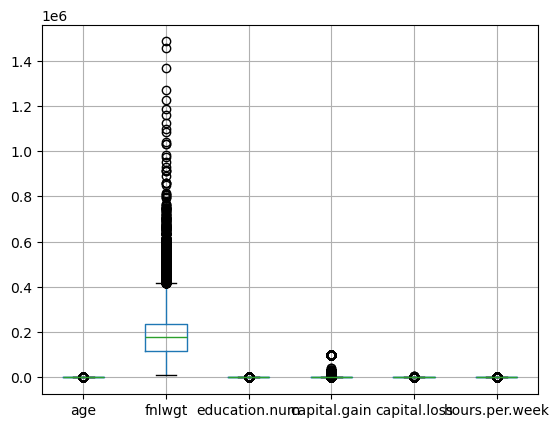

In [124]:
df1.boxplot()
plt.show()

In [125]:
### outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    ## df[column]= df[column].apply(lambda x:x if x>=lower_extreme else x if x<= upper_extreme) 
    df[column]= df[column].apply(lambda x:lower_extreme if x<lower_extreme else upper_extreme if x> upper_extreme else x) 
for col in df1.select_dtypes(['int','float']).columns:
    outlier_capping(df1,col)

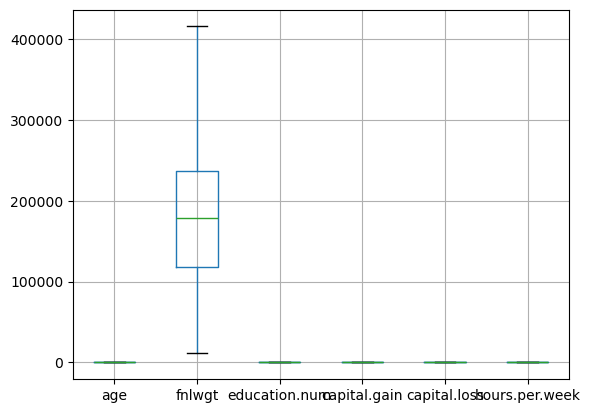

In [126]:
df1.boxplot()
plt.show()

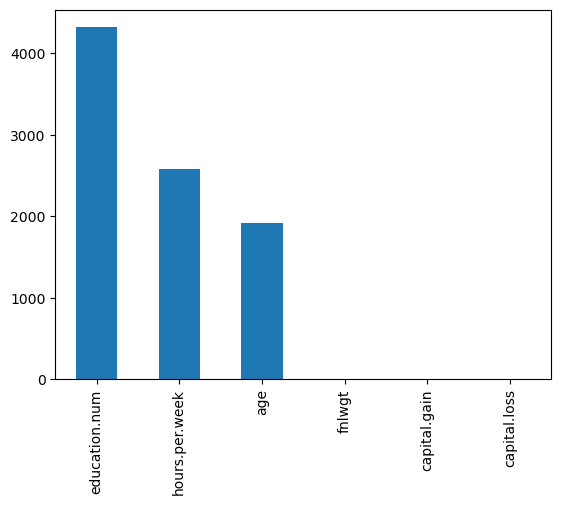

In [127]:
#### feature selection
f_class= f_classif(df1,target)
pd.Series(f_class[0],index=df1.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [128]:
df1.columns

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

In [129]:
df1.drop(columns=['fnlwgt','capital.gain', 'capital.loss'],inplace=True)

In [130]:
df1.head()

,age,education.num,hours.per.week
0,78.0,9.0,40.0
1,78.0,9.0,32.5
2,66.0,10.0,40.0
3,54.0,4.5,40.0
4,41.0,10.0,40.0


In [132]:
df2.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States


In [134]:
for col in df2.columns:
    print(col)
    print(df2[col].unique())

workclass
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
education
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
marital.status
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
race
['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
sex
['Female' 'Male']
native.country
['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' '

In [135]:
df2['workclass'].replace('?',np.nan,inplace=True)
df2['occupation'].replace('?',np.nan,inplace=True)
df2['native.country'].replace('?',np.nan,inplace=True)

In [137]:
df2.fillna({'workclass':df.workclass.mode()[0],'occupation':df.occupation.mode()[0],
            'native.country':df['native.country'].mode()[0]},inplace=True)

In [138]:
df2.isnull().sum()

workclass         0
education         0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
native.country    0
dtype: int64

In [146]:
ord_enc= OrdinalEncoder()
df2=pd.DataFrame(ord_enc.fit_transform(df2),columns=df2.columns)
df2.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,3.0,11.0,6.0,9.0,1.0,4.0,0.0,38.0
1,3.0,11.0,6.0,3.0,1.0,4.0,0.0,38.0
2,3.0,15.0,6.0,9.0,4.0,2.0,0.0,38.0
3,3.0,5.0,0.0,6.0,4.0,4.0,0.0,38.0
4,3.0,15.0,5.0,9.0,3.0,4.0,0.0,38.0


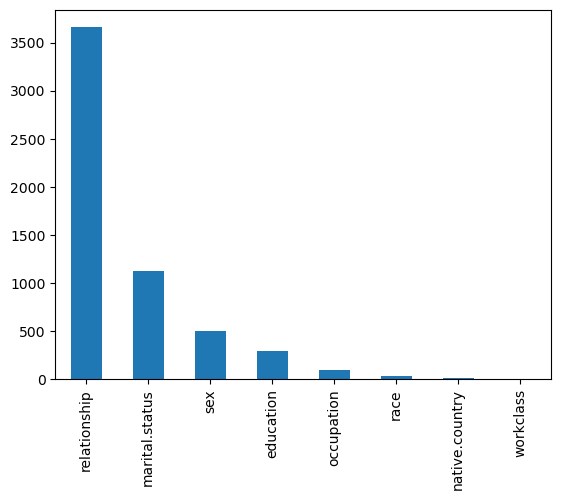

In [150]:
chi= chi2(df2,target)
pd.Series(chi[0],index=df2.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [151]:
df2.drop(columns=['race','native.country','workclass'],inplace=True)

In [152]:
df2.head()

,education,marital.status,occupation,relationship,sex
0,11.0,6.0,9.0,1.0,0.0
1,11.0,6.0,3.0,1.0,0.0
2,15.0,6.0,9.0,4.0,0.0
3,5.0,0.0,6.0,4.0,0.0
4,15.0,5.0,9.0,3.0,0.0


In [154]:
features_new= pd.concat([df1,df2],axis=1)
features_new.head()

,age,education.num,hours.per.week,education,marital.status,occupation,relationship,sex
0,78.0,9.0,40.0,11.0,6.0,9.0,1.0,0.0
1,78.0,9.0,32.5,11.0,6.0,3.0,1.0,0.0
2,66.0,10.0,40.0,15.0,6.0,9.0,4.0,0.0
3,54.0,4.5,40.0,5.0,0.0,6.0,4.0,0.0
4,41.0,10.0,40.0,15.0,5.0,9.0,3.0,0.0


In [155]:
x_train,x_test,y_train,y_test= train_test_split(features_new,target,train_size=0.75,random_state=100,stratify=target)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24402, 8)
(8135, 8)
(24402, 1)
(8135, 1)


In [156]:
std_sca=StandardScaler()

In [157]:
x_train[['age','education.num','hours.per.week']]= std_sca.fit_transform(x_train[['age','education.num','hours.per.week']])
x_test[['age','education.num','hours.per.week']]=std_sca.transform(x_test[['age','education.num','hours.per.week']])

#### Adaboost

In [158]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [159]:
ada_boost= AdaBoostClassifier(estimator=LogisticRegression(),n_estimators=100)
ada_boost.fit(x_train,y_train)
y_pred= ada_boost.predict(x_test)
accuracy_score(y_test,y_pred)

0.7859864781807007

#### Gradient Boost

In [161]:
grad_boost= GradientBoostingClassifier(n_estimators=100,learning_rate=0.5,subsample=1.0,max_features=1,random_state=50)
grad_boost.fit(x_train,y_train)
y_pred= grad_boost.predic.t(x_test)
accuracy_score(y_test,y_pred)

0.8350338045482483

In [162]:
### Hyper parameter tuning using gridsearch
params={'n_estimators':[50,100,150,200],'learning_rate':[0.1,0.2,0.5,1]}
grid_search= GridSearchCV(grad_boost,params)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'learning_rate': 0.2, 'n_estimators': 200}

In [164]:
grad_boost= GradientBoostingClassifier(n_estimators=200,learning_rate=0.2,subsample=1.0,max_features=1,random_state=50)
grad_boost.fit(x_train,y_train)
y_pred= grad_boost.predict(x_test)
accuracy_score(y_test,y_pred)

0.8367547633681622

#### XGBM

In [167]:
#!pip install xgboost

In [168]:
import xgboost as xgb

In [169]:
xgb= xgb.XGBClassifier(n_estimators=200,learning_rate=0.2,subsample=1.0,max_features=1,random_state=50,
                       reg_alpha=10,reg_lambda =10,min_child_weight=2)                       

In [170]:
xgb.fit(x_train,y_train)
y_pred= xgb.predict(x_test)
accuracy_score(y_test,y_pred)

0.8357713583282115

In [ ]:
### Hyper parameter tuning using gridsearch
params={'n_estimators':[50,100,150,200],'learning_rate':[0.1,0.2,0.5,1],'reg_alpha':[5,10,20],
        'reg_lambda':[5,10,20],'min_child_weight':[1,2,3,4]}
grid_search= GridSearchCV(xgb,params)
grid_search.fit(x_train,y_train)
grid_search.best_params_